# PROJECT TEAM ID :PTID-CDS-JUN-23-1538

# PRCP-1016-HeartDiseasePrediction

# Problem Statement

# importing libraries

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import pyforest
import warnings
warnings.filterwarnings('ignore')


# load the dataset

# domain analysis

In [2]:
pwd

'C:\\Users\\prave\\Downloads\\CAPSTONE PROJECTS\\Project 2\\Data'

In [3]:
df1=pd.read_csv('values.csv')

In [4]:
df1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [5]:
df2=pd.read_csv('labels.csv')

In [6]:
df2.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [7]:
data=pd.merge(df1,df2, on='patient_id',how='inner')

In [8]:
data

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [9]:
data.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [10]:
data.shape

(180, 15)

In [11]:
data.size

2700

In [12]:
data.nunique()

patient_id                              180
slope_of_peak_exercise_st_segment         3
thal                                      3
resting_blood_pressure                   36
chest_pain_type                           4
num_major_vessels                         4
fasting_blood_sugar_gt_120_mg_per_dl      2
resting_ekg_results                       3
serum_cholesterol_mg_per_dl             118
oldpeak_eq_st_depression                 34
sex                                       2
age                                      40
max_heart_rate_achieved                  73
exercise_induced_angina                   2
heart_disease_present                     2
dtype: int64

In [13]:
data.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [15]:
data.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [16]:
data.drop(['patient_id'],axis=1,inplace=True)

In [17]:
data

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [18]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

In [19]:
d_object=data.select_dtypes(include='object')

In [20]:
d_object

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


In [21]:
d_numeric=data.select_dtypes(exclude='object')

In [22]:
d_numeric

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0


# exploratory data analysis

    1)continuous data : hist plot
    2)discrete  data  : count plot
    3)categorical data : count plot

# univariate analysis

In [23]:
#separating continuous columns 
c=[]
for i in data.select_dtypes('number'):
    if data[i].nunique()>20:
        c.append(i)
c
    
    

['resting_blood_pressure',
 'serum_cholesterol_mg_per_dl',
 'oldpeak_eq_st_depression',
 'age',
 'max_heart_rate_achieved']

In [24]:
data_con=data[c]
data_con

,resting_blood_pressure,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,age,max_heart_rate_achieved
0,128,308,0.0,45,170
1,110,214,1.6,54,158
2,125,304,0.0,77,162
3,152,223,0.0,40,181
4,178,270,4.2,59,145
...,...,...,...,...,...
175,125,254,0.2,67,163
176,180,327,3.4,55,117
177,125,309,1.8,64,131
178,124,255,0.0,48,175


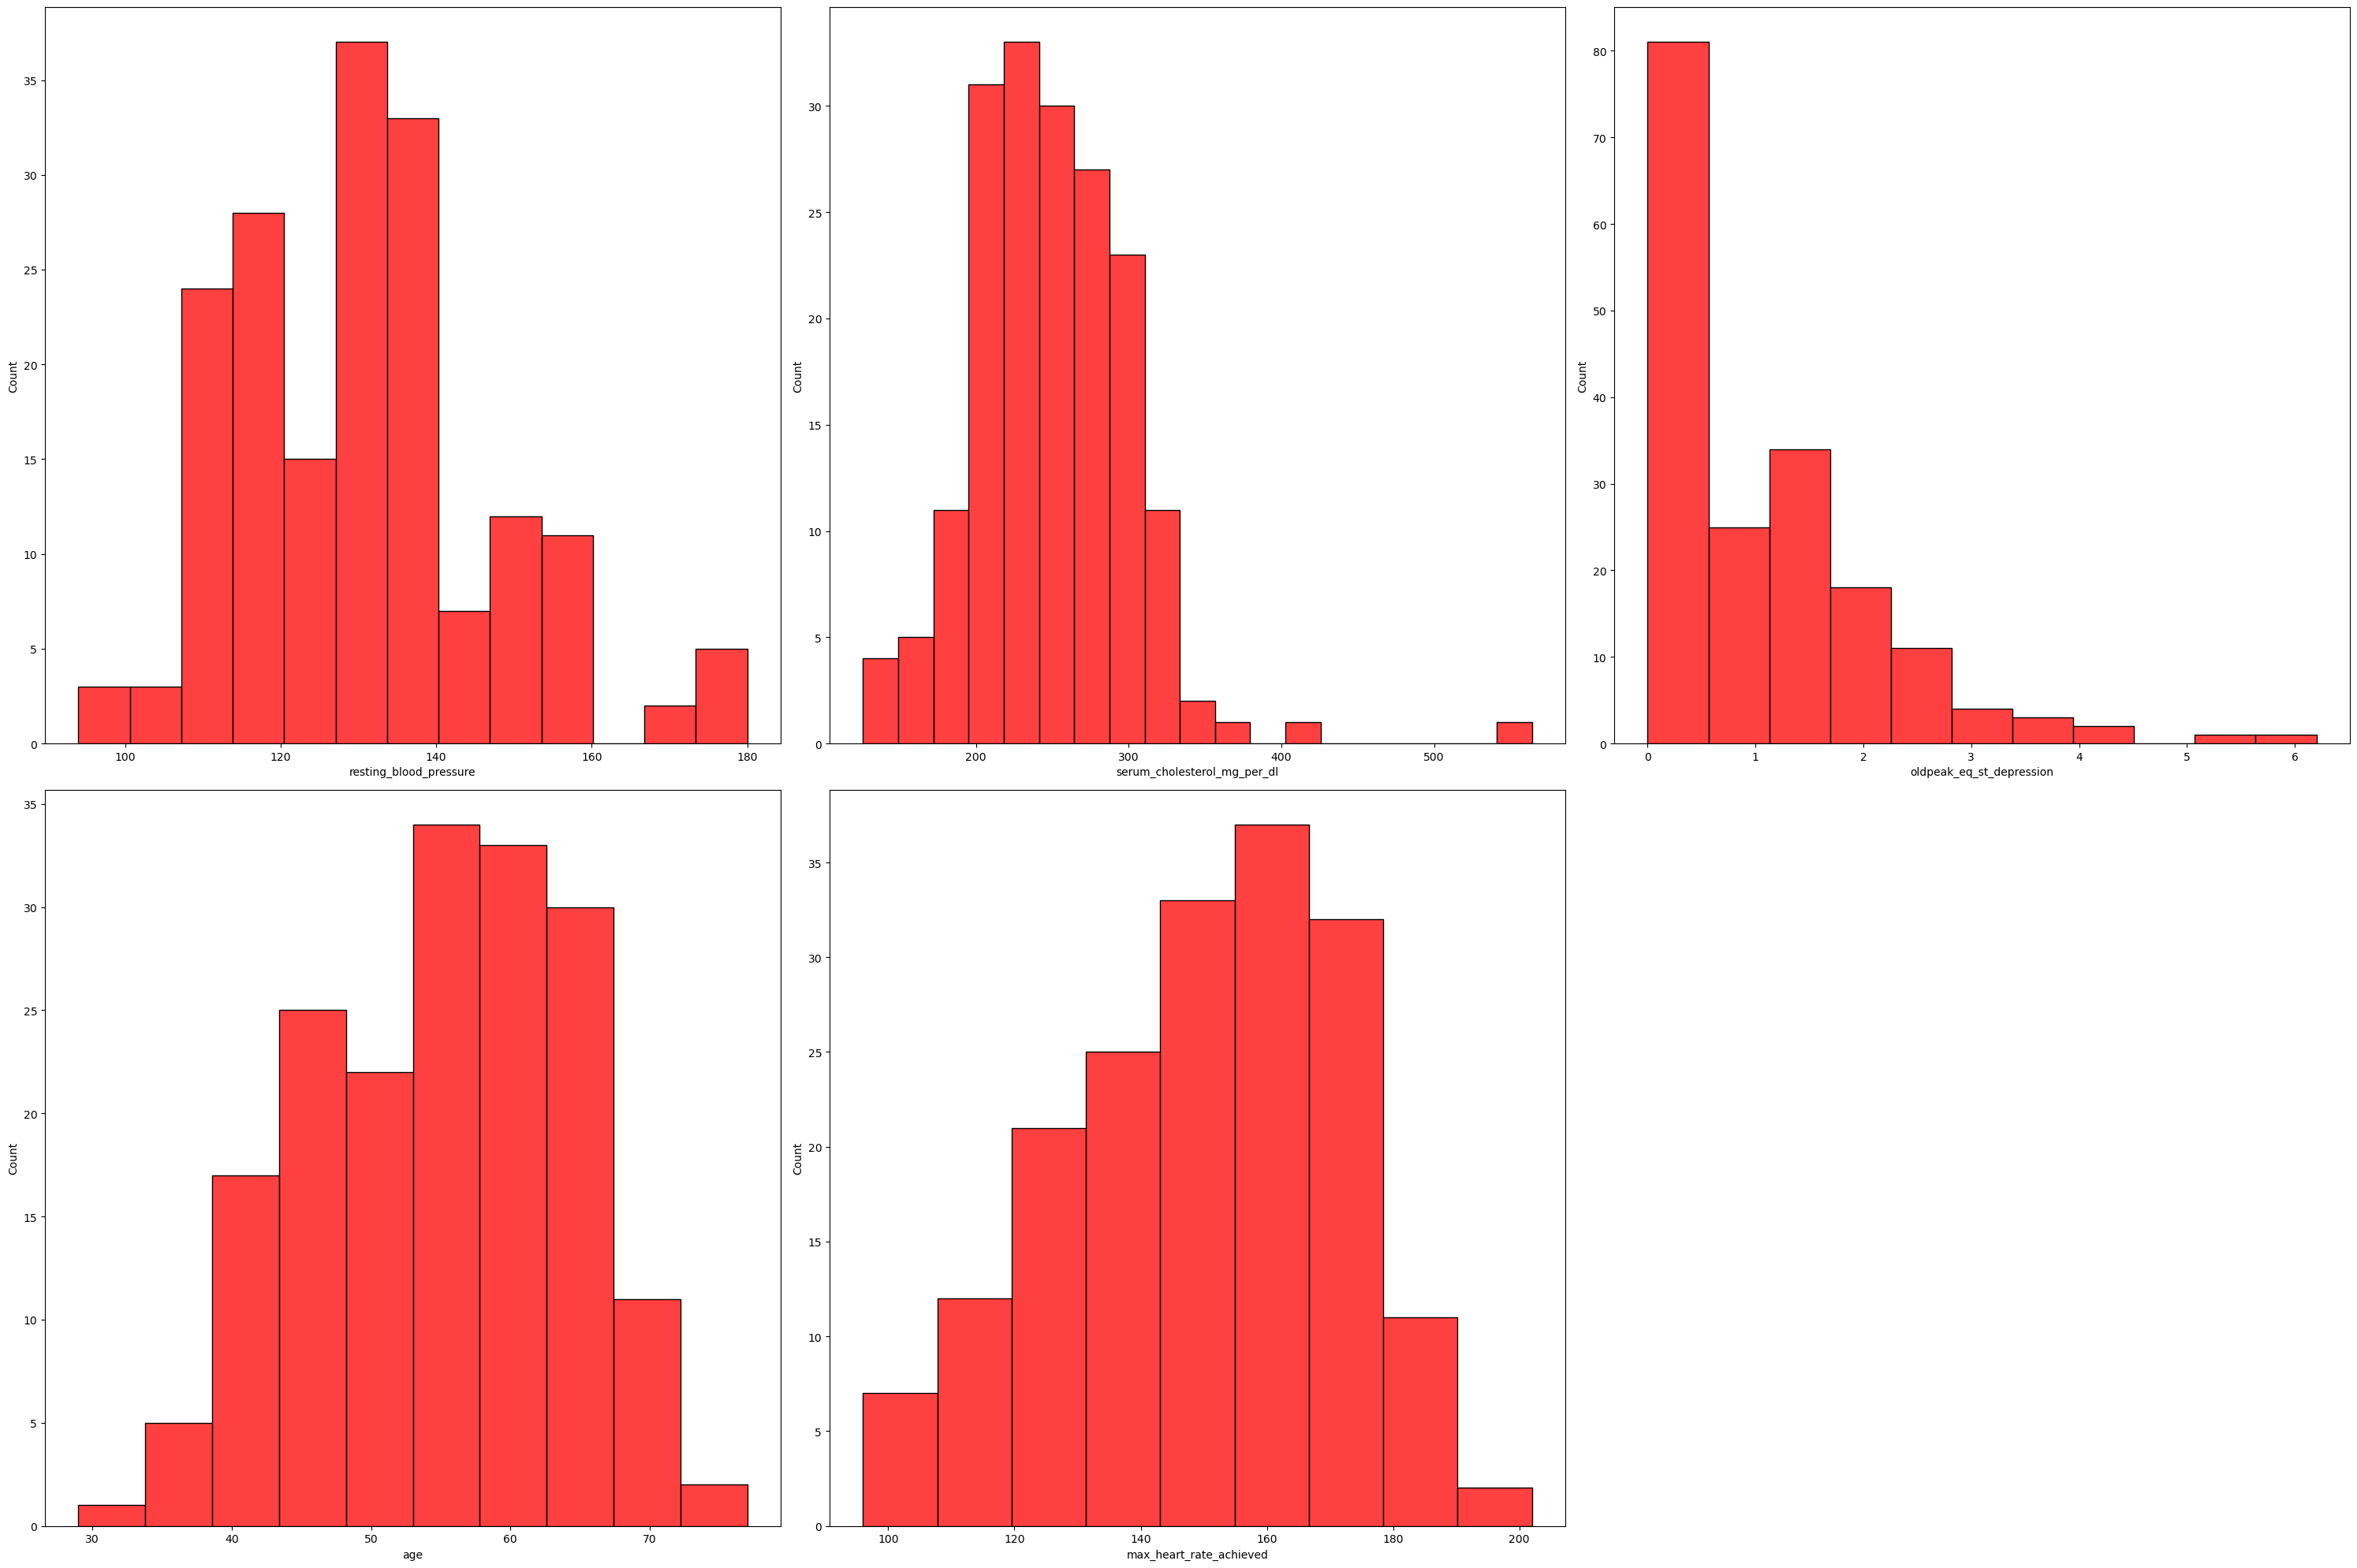

In [25]:
plt.figure(figsize=(30,20))
plotnumber=1
for i in data_con.columns:
    plt.subplot(2,3,plotnumber)
    sns.histplot(data_con[i],color='red')
    plotnumber+=1
plt.tight_layout()

# insights
    
     * most of the persons resting blood pressure lies between 110 t0 140mmhg
     * most  of the persons serum cholesterol range lies between 200mg/dl to 300mg\dl
     * measure of electrocardiagram is in mainly four levels
     * most of the persons age range lies between 45 to 68yrs
     * most of the persons heart rate lies between 120 to 180 beats/miniute

In [26]:
d=[]
for i in data.select_dtypes('number'):
    if i not in data_con:
        d.append(i)
d

['slope_of_peak_exercise_st_segment',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'sex',
 'exercise_induced_angina',
 'heart_disease_present']

In [27]:
data_dis=data[d]
data_dis

,slope_of_peak_exercise_st_segment,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,sex,exercise_induced_angina,heart_disease_present
0,1,2,0,0,2,1,0,0
1,2,3,0,0,0,0,0,0
2,1,4,3,0,2,1,1,1
3,1,4,0,0,0,1,0,1
4,3,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...
175,2,4,2,1,0,1,0,1
176,2,4,0,0,1,0,1,1
177,2,3,0,0,0,1,1,1
178,1,3,2,1,0,1,0,0


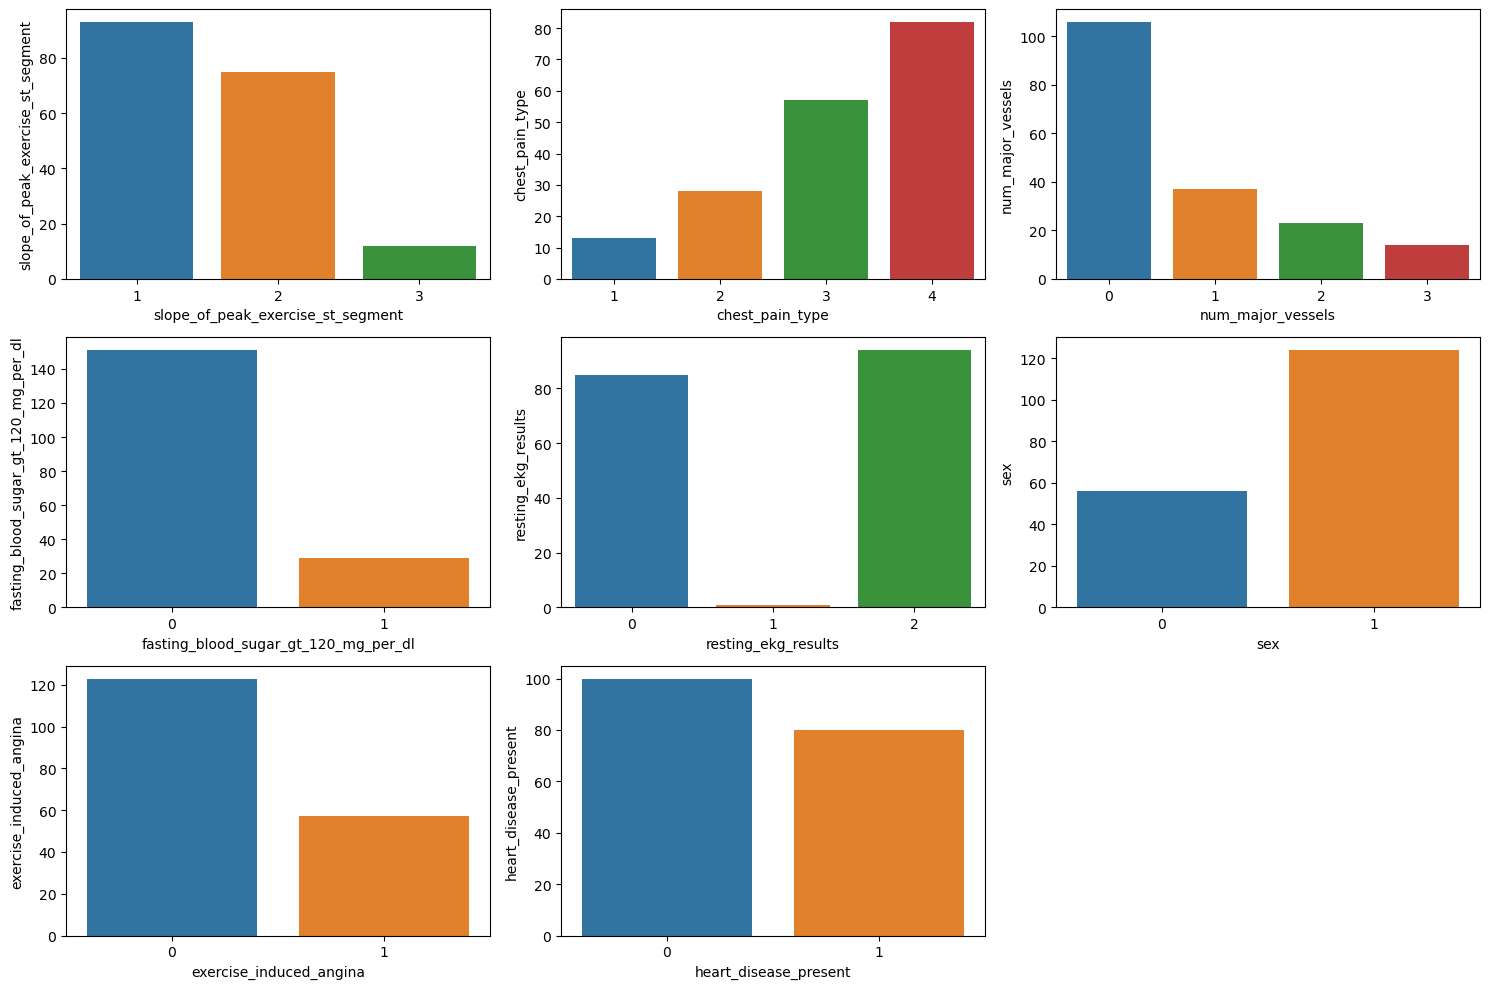

In [28]:
plt.figure(figsize=(15,10))
plotnumber=1
for i in data_dis.columns:
    plt.subplot(3,3,plotnumber)
    sns.countplot(x=data_dis[i])
    plt.xlabel(i,fontsize=10)
    plt.ylabel(i,fontsize=10)
    plotnumber+=1
    plt.tight_layout()


# insights
* Quality of blood flow is mostly in the first two catogories.
* Chest pain has four types. In this four types, type three and four are affecting more.
* The color of Flourosopy in people is more in first level.
* Fasting blood sugar is mostly greater than 120mg/dl.
* Resting electrocardiography results are in category one and three.
* Males are more no.of records than females.
* Most of them are not having exercise_induced_angina chest pain.
* out of 180 records 100 members has no heart disease and 80 members has heart disease.From this we can say the no.of
people is more without heart disease than with heart disease.

In [29]:
data_cat=data.select_dtypes(include=['object'])

In [30]:
data_cat

,thal
0,normal
1,normal
2,normal
3,reversible_defect
4,reversible_defect
...,...
175,reversible_defect
176,normal
177,reversible_defect
178,normal


<AxesSubplot:xlabel='thal', ylabel='count'>

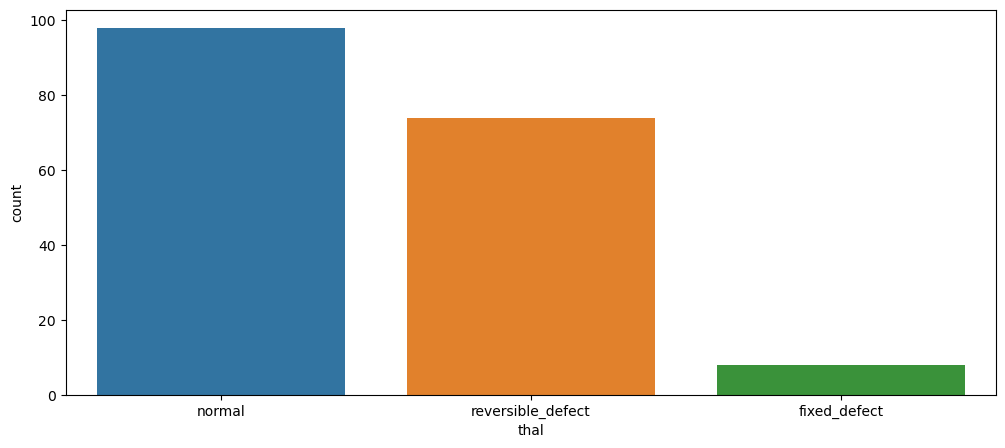

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(x=data['thal'])

# insights
* Thal(thallium stress test) measures the blood flow to the heart.
* most of them are having normal and reversible_defect

# bivariate analysis

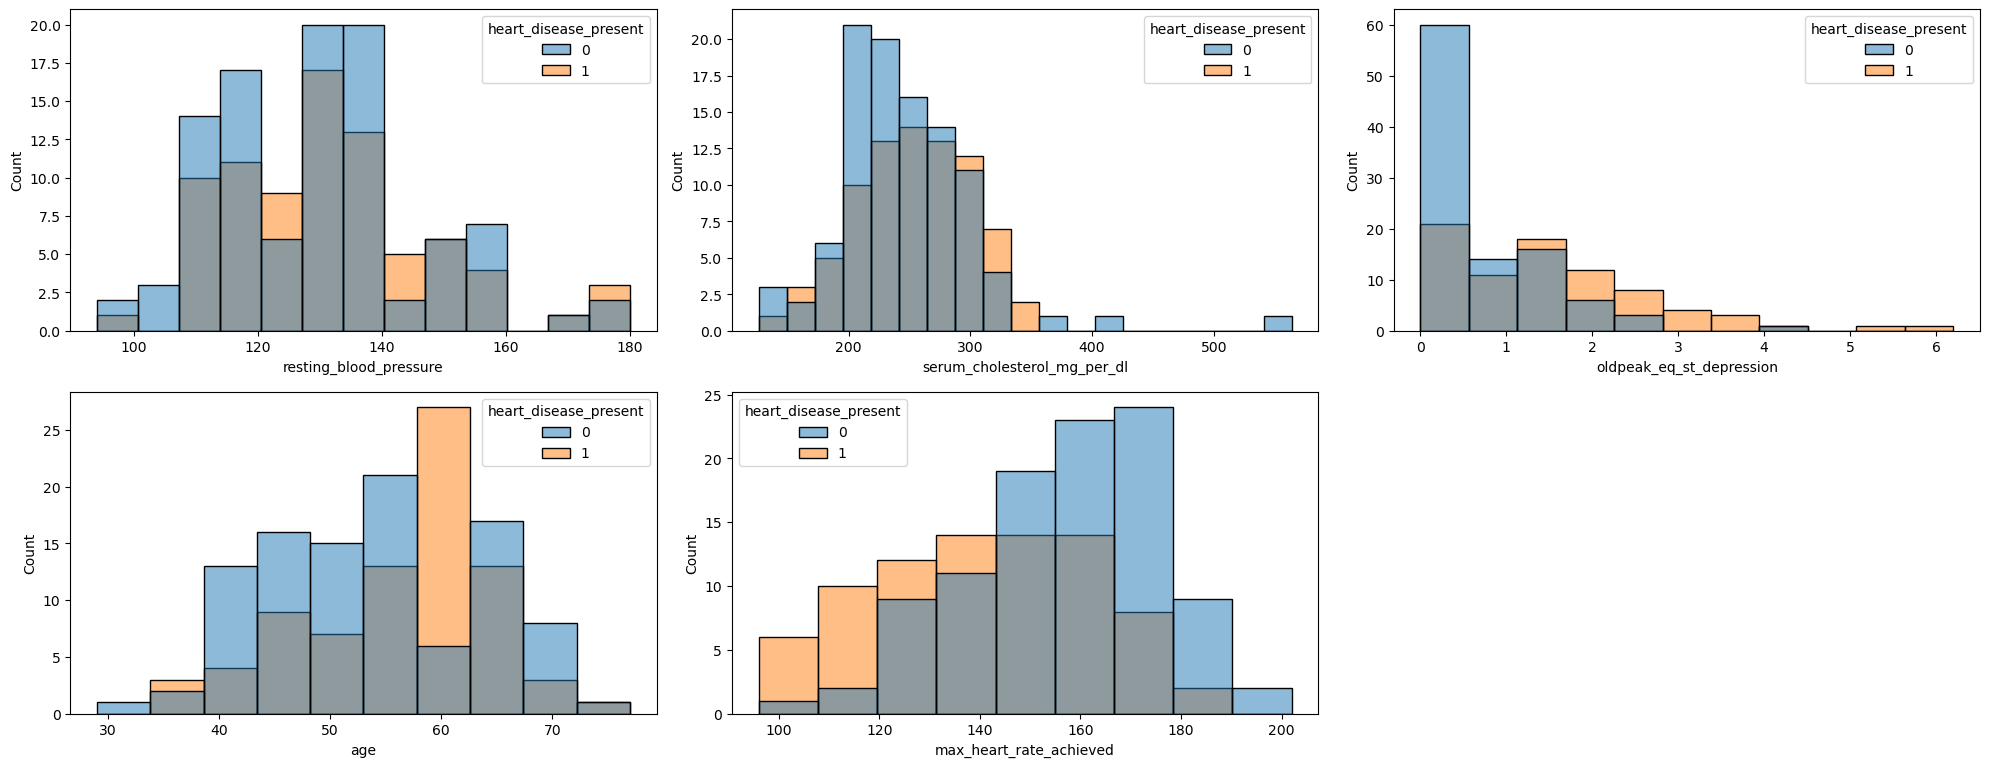

In [32]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in data_con.columns:
    plt.subplot(4,3,plotnumber)
    sns.histplot(x=i,hue='heart_disease_present',data=data)
    plotnumber+=1
    plt.tight_layout()

# insights
* People who are having resting blood pressure of 120-125mmHg and 140-145mmHg is getting heart disease.
* People who are having serum cholesterol  300-375mg/dL are getting heart disease.
* If Measure of electrocardiogram crosses the third level there high chance of getting heart disease.
* people whose age ranges from 58-65 are getting heart disease.
* If the heart rate ranges from 100-120 there is a high chance of heart disease.

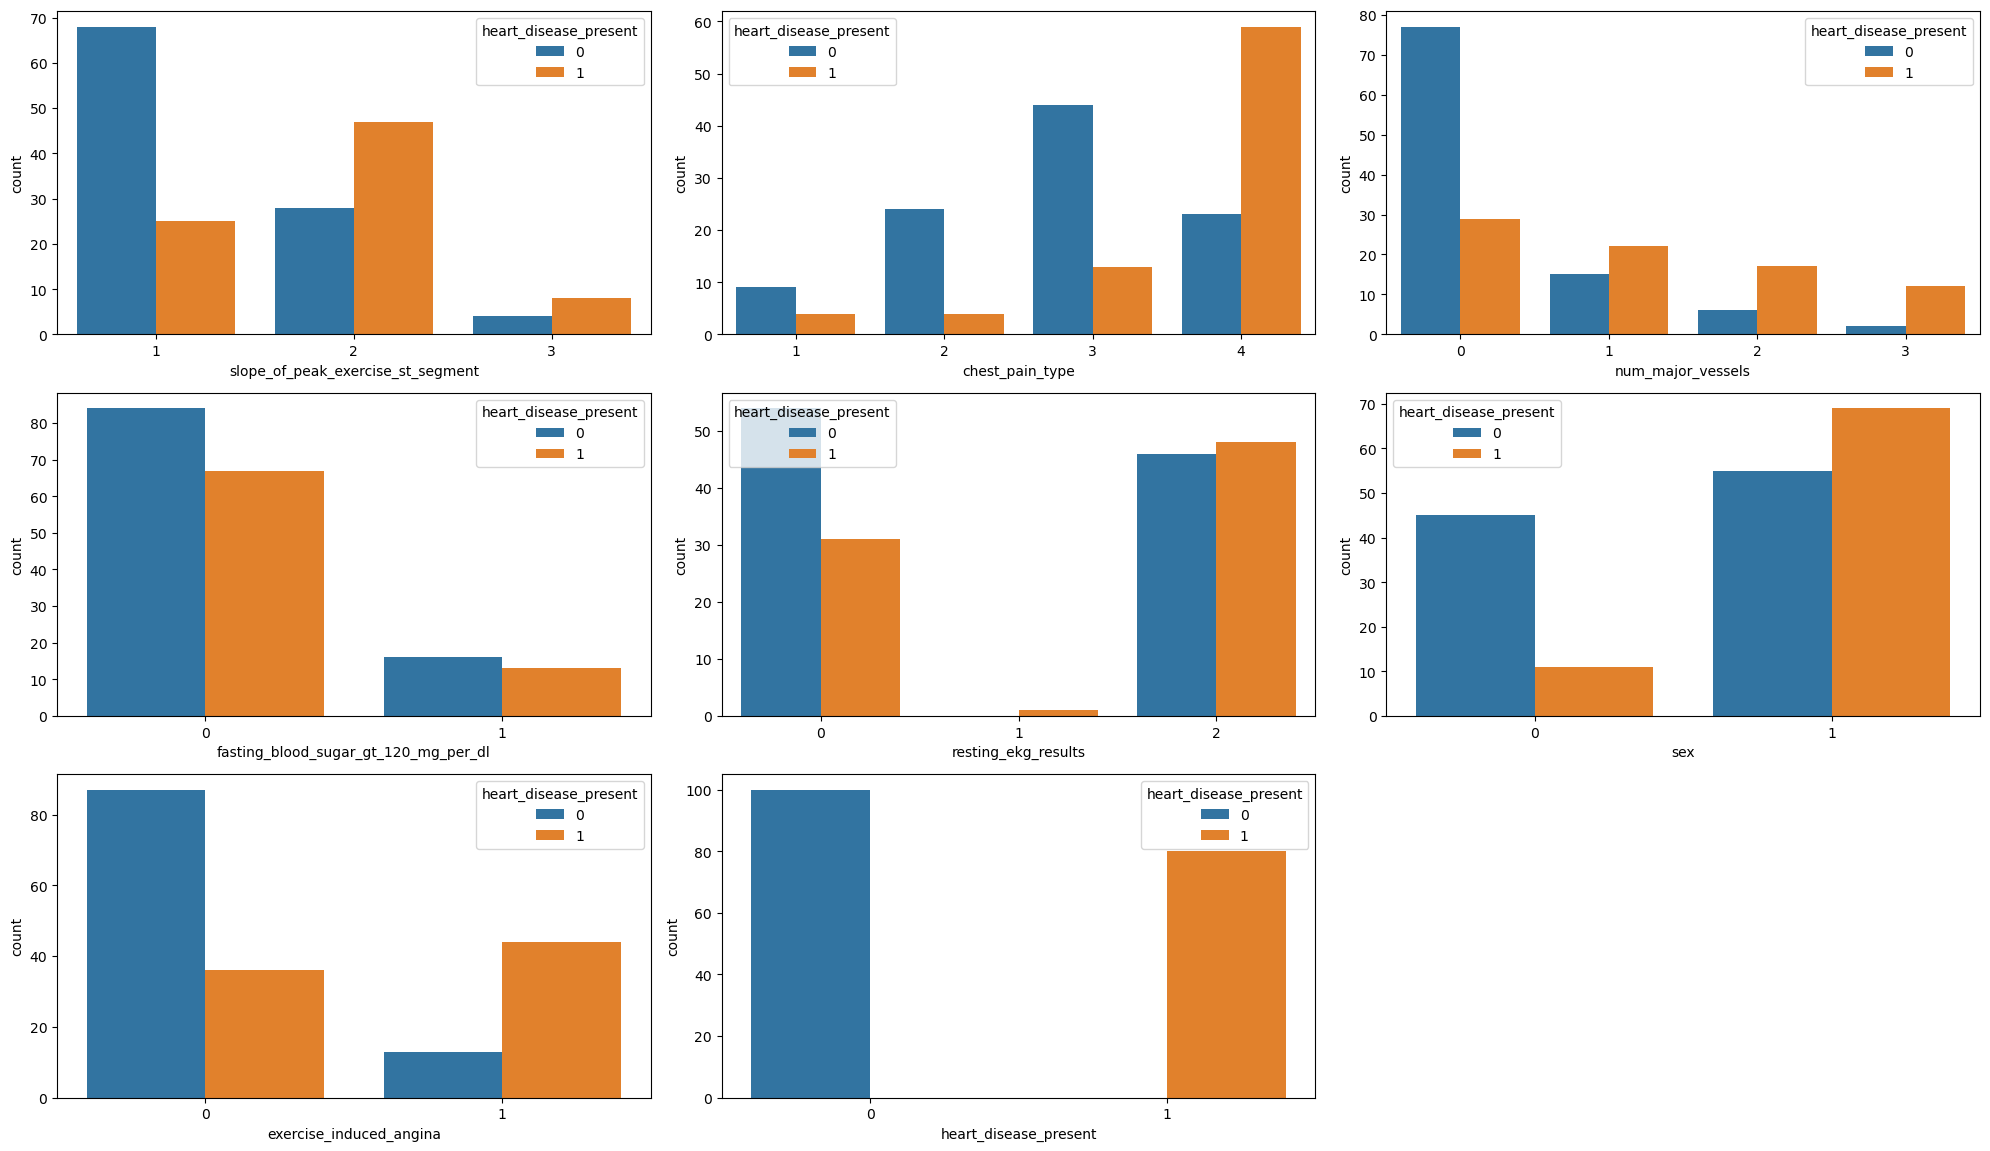

In [33]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in data_dis.columns:
    plt.subplot(4,3,plotnumber)
    sns.countplot(x=i,hue='heart_disease_present',data=data)
    plotnumber+=1
    plt.tight_layout()

# insights
 People who are in the second stage of quality boold flow to the heart(slope_of_peak_exercise_st_segment) is getting
more heart disease.
* People who are resulting in thallium stree test as reversible defect are getting heart disease.
* In chest pain four is getting more heart disease.
* If the flourosopy level inreases then heart disease will come like in fourth level in num_major_vessels.
* Fasting blood sugar is not affecting on heart disease. 
* Resting ekg results who are having in third category is getting heart disease.
* Males are mostly getting heart disease.
* People who are having exercise induced chest pain is getting heart disease.

# multivariate analysis

<AxesSubplot:>

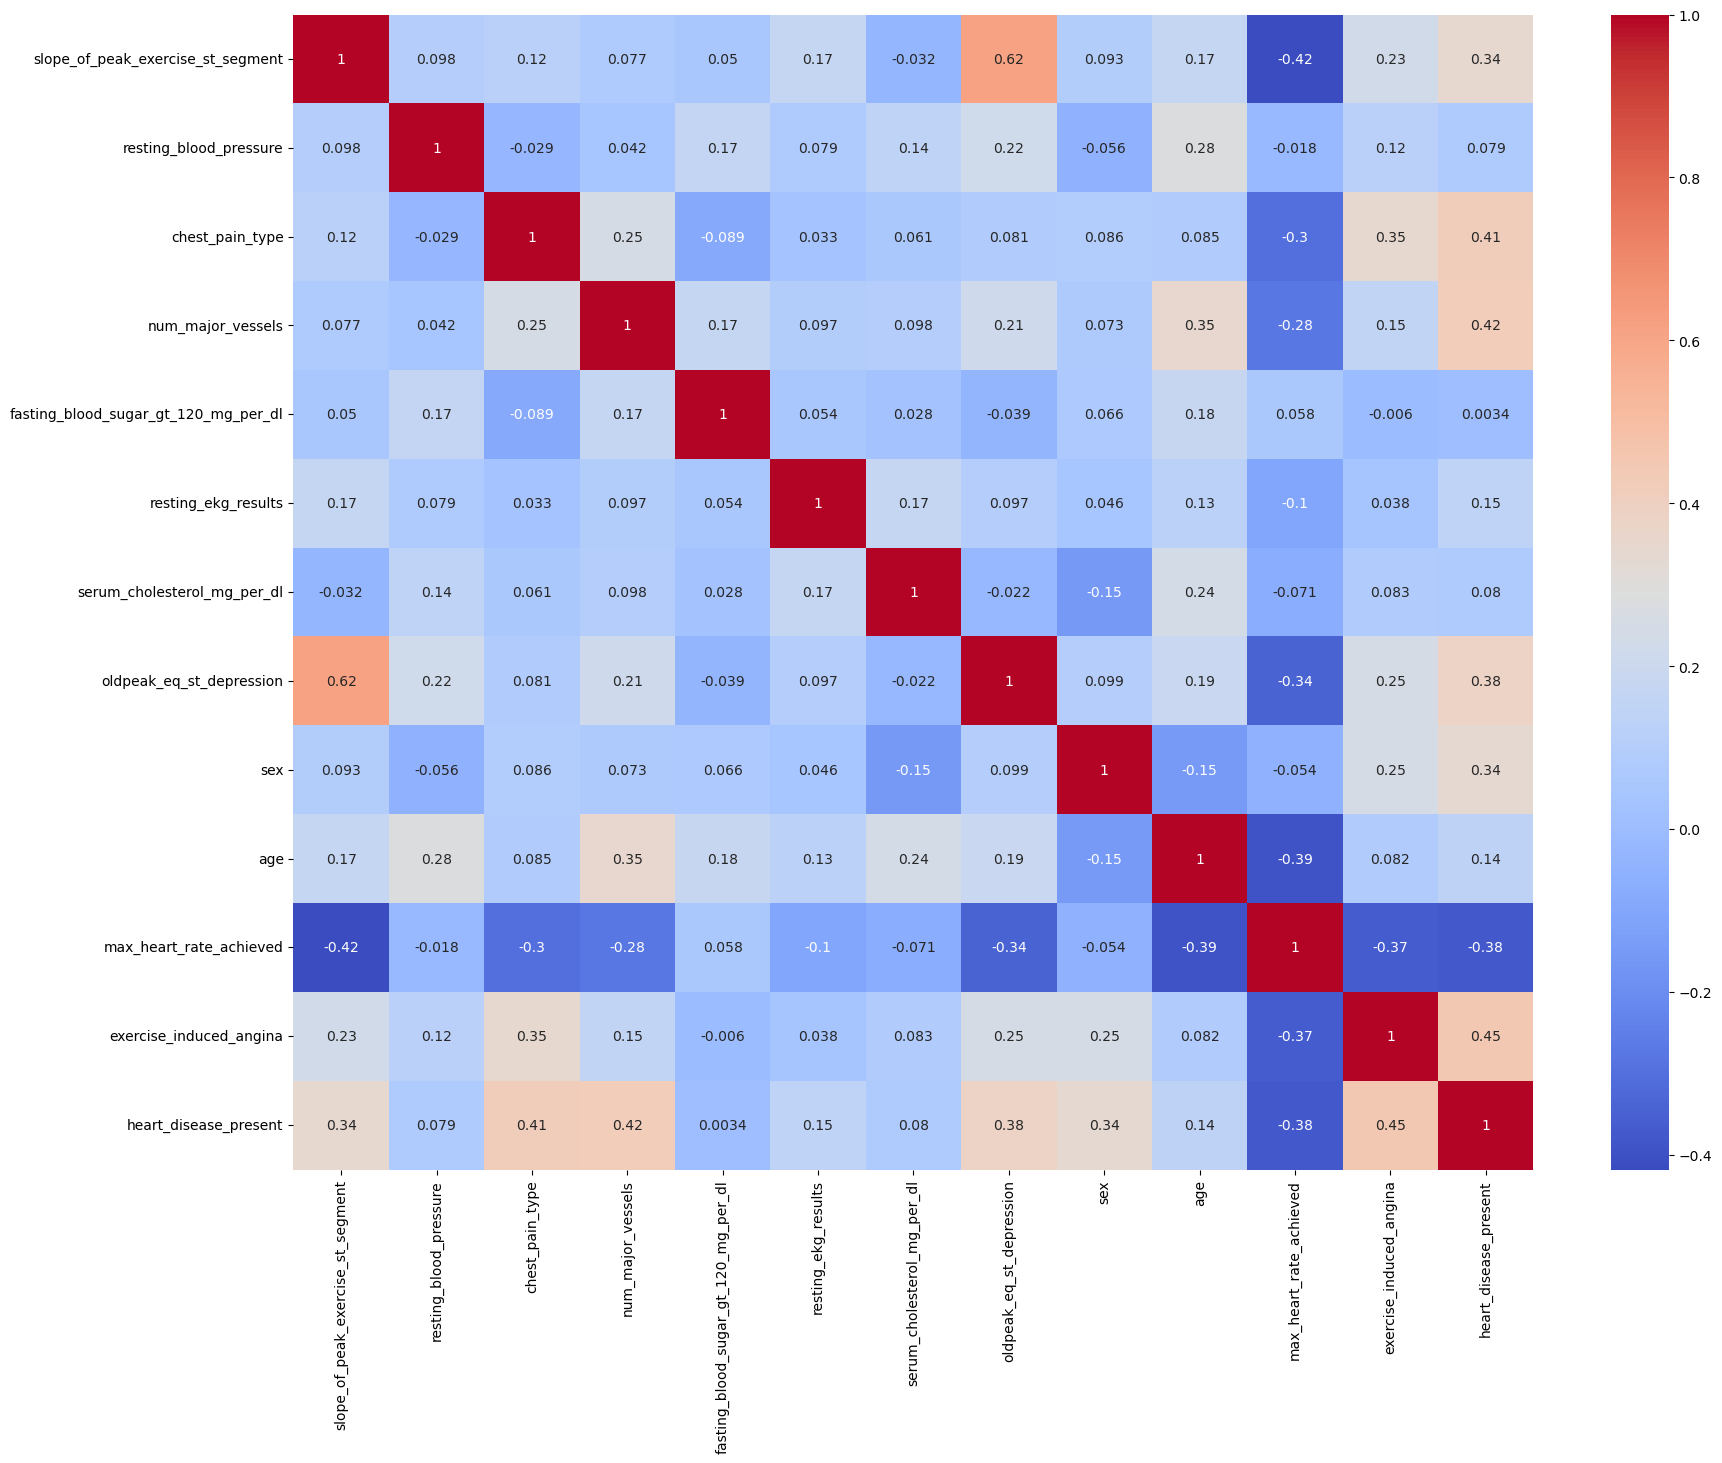

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

<Figure size 2000x1500 with 0 Axes>

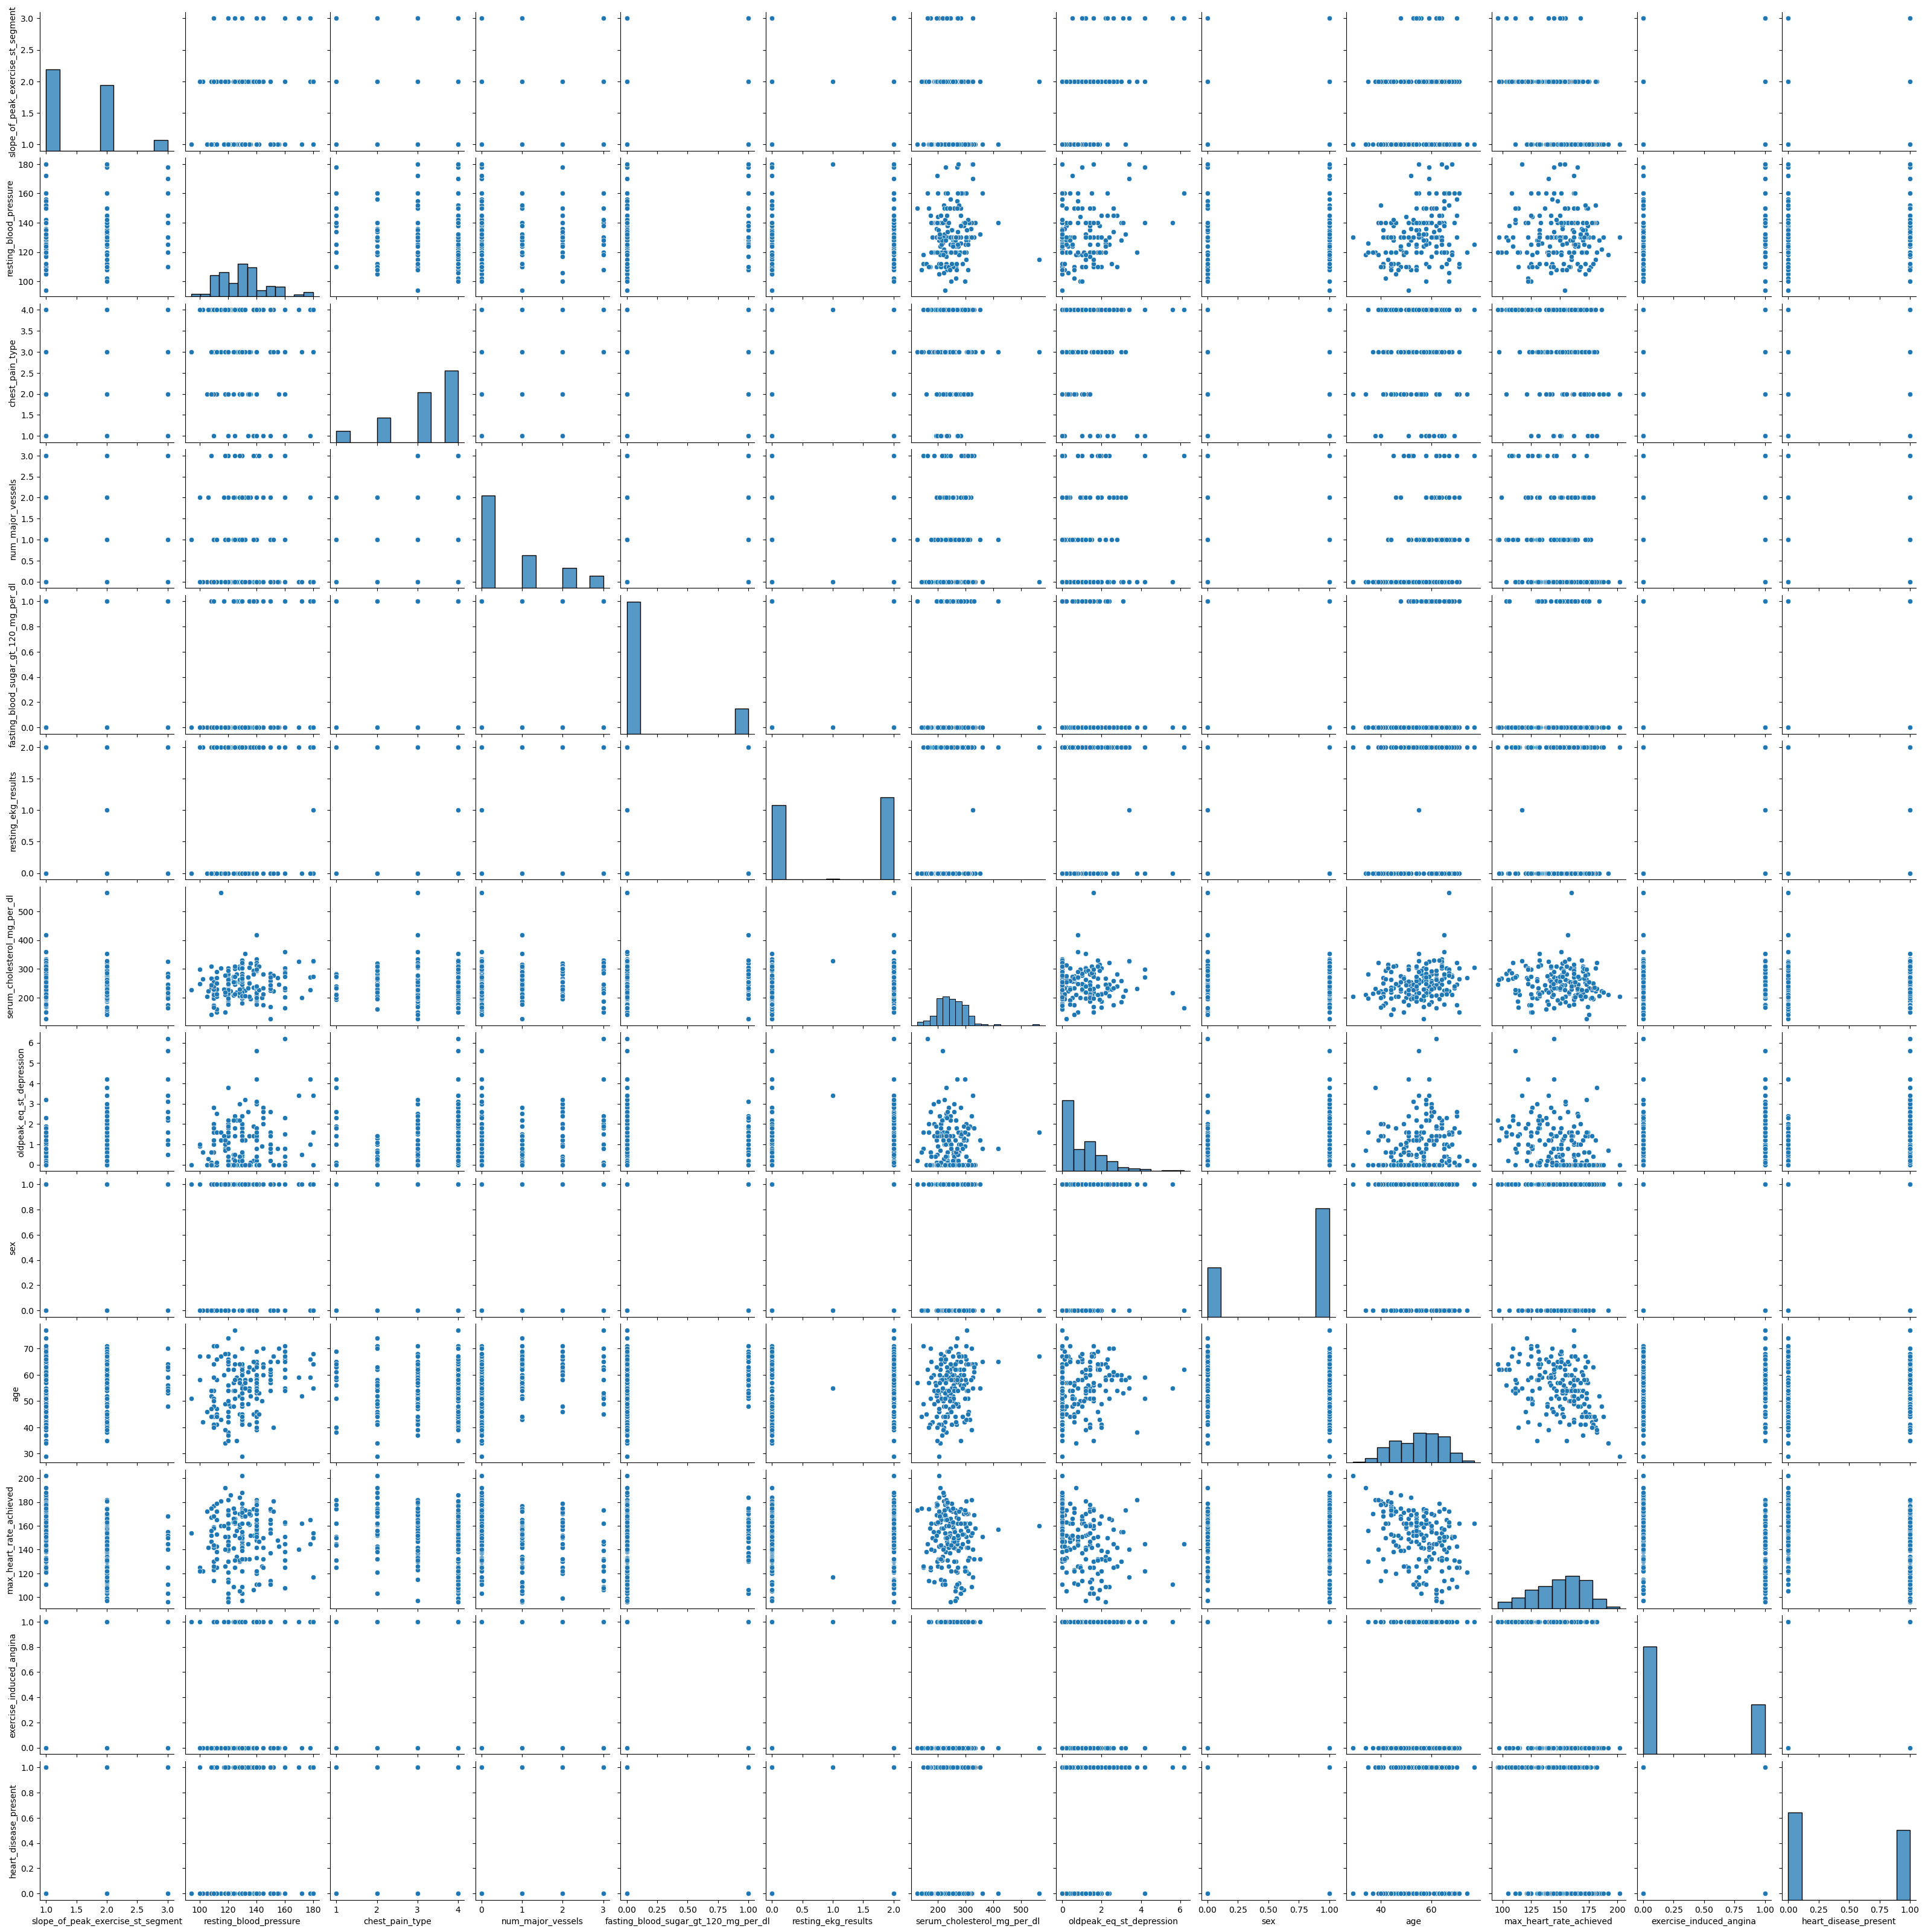

In [35]:
plt.figure(figsize=(20,15))
sns.pairplot(data)

# insights
* Correlation b/w each variable is less 0.8.
* Most of the columns are having linear relationship with other feature.
* In pair we see only two kinds of plot(histogram and scatterplot)

# data preprocessing
## steps in data preprocessing
         i)   Handling null values 
         ii)  Handling Outliers
         iii) Encoding (converting categorical variables into numerical)
         iv)  Balancing the data
          v)   Scaling

In [36]:
data.isnull().sum()

slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

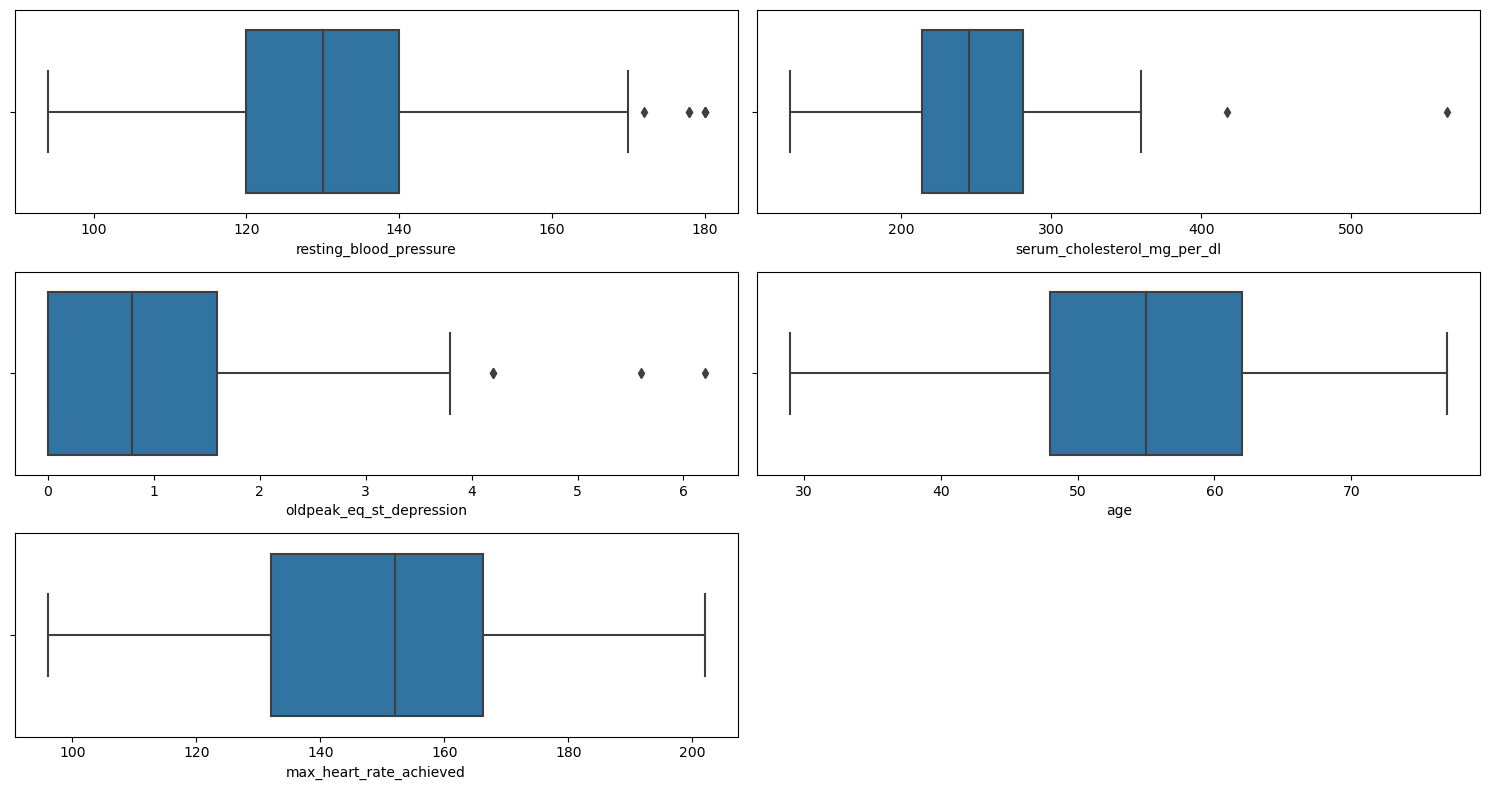

In [37]:
plt.figure(figsize=(15,8))
plotnum=1
for i in data_con.columns:
    plt.subplot(3,2,plotnum)
    sns.boxplot(data_con[i])
    plt.xlabel(i)
    plotnum=plotnum+1
plt.tight_layout()
    

# insights
* From the above figures resting_blood_pressure,serum_cholesterol_mg_per_dl and oldpeak_eq_st_depression columns having outliers

In [38]:
k=['resting_blood_pressure','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression']

# interquantile range formula
qunatile1 = 25th percentile

quantile3 = 75th percentile

Interquantile range = quantile3-quantile1

lower_bound=qunatile1-1.5*Interqunatilerange

upper_bound=quantile3+1.5*Interquantilerange

In [39]:
def outliers(data,k):
    for i in k:
        q1,q3=data[i].quantile([0.25,0.75])
        iqr=q3-q1
        lower_bound=q1-1.5*iqr
        upper_bound=q3+1.5*iqr
        data[i]=np.where(data[i]<lower_bound,lower_bound,np.where(data[i]>upper_bound,upper_bound,data[i]))
    return data

In [40]:
data=outliers(data,k)

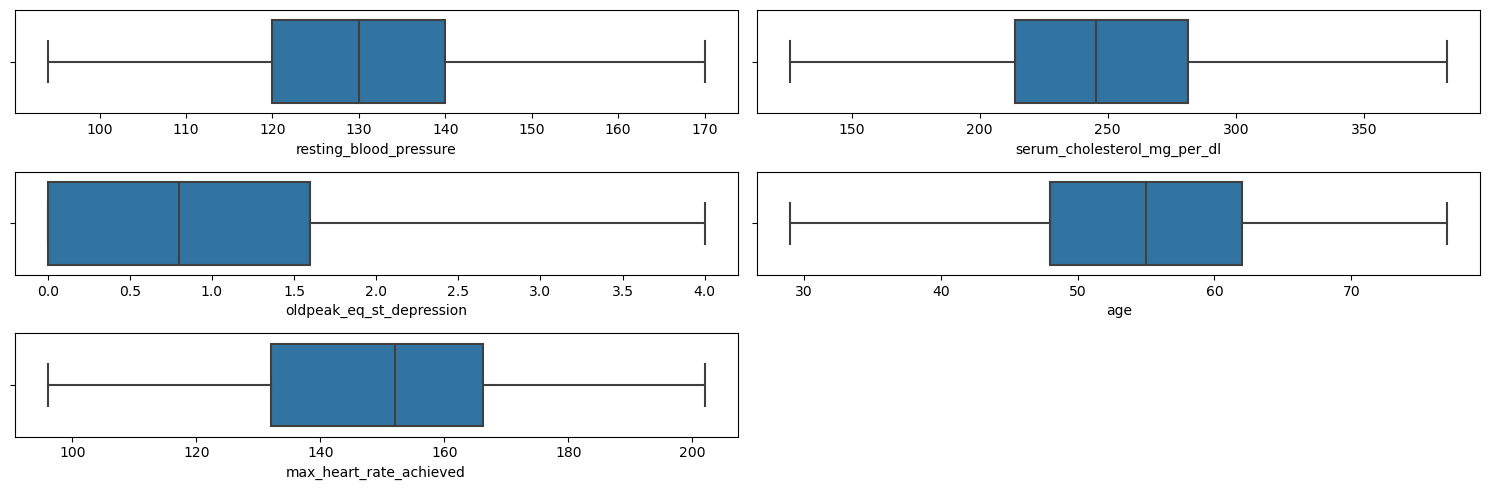

In [41]:
plt.figure(figsize=(15,5))
plotnum=1
for i in data.columns:
    if i in data_con.columns:
        plt.subplot(3,2,plotnum)
        sns.boxplot(data[i])
        plotnum=plotnum+1
plt.tight_layout()

In [42]:
data['thal'].value_counts()

normal               98
reversible_defect    74
fixed_defect          8
Name: thal, dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    object 
 2   resting_blood_pressure                180 non-null    float64
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

# conversion of categorical to numerical

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.thal=le.fit_transform(data.thal)

In [45]:
data.thal

0      1
1      1
2      1
3      2
4      2
      ..
175    2
176    1
177    2
178    1
179    1
Name: thal, Length: 180, dtype: int32

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   thal                                  180 non-null    int32  
 2   resting_blood_pressure                180 non-null    float64
 3   chest_pain_type                       180 non-null    int64  
 4   num_major_vessels                     180 non-null    int64  
 5   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 6   resting_ekg_results                   180 non-null    int64  
 7   serum_cholesterol_mg_per_dl           180 non-null    float64
 8   oldpeak_eq_st_depression              180 non-null    float64
 9   sex                                   180 non-null    int64  
 10  age                                   180 non-null    int64  
 11  max_heart_rate_achi

# feature selection

In [47]:
data.corr()

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
slope_of_peak_exercise_st_segment,1.000000,0.154101,0.092748,0.121207,0.076832,0.050199,0.172191,-0.047721,0.614943,0.093340,0.169918,-0.418102,0.225459,0.344224
thal,0.154101,1.000000,-0.012616,0.269583,0.174107,-0.070225,-0.052171,0.030316,0.247317,0.265420,-0.007934,-0.142098,0.360395,0.447214
resting_blood_pressure,0.092748,-0.012616,1.000000,-0.032202,0.050324,0.162294,0.083871,0.173974,0.203517,-0.048326,0.283972,-0.015768,0.111932,0.077279
chest_pain_type,0.121207,0.269583,-0.032202,1.000000,0.249061,-0.088992,0.033379,0.072003,0.070475,0.086057,0.085001,-0.301792,0.346266,0.412829
num_major_vessels,0.076832,0.174107,0.050324,0.249061,1.000000,0.169792,0.096656,0.122917,0.207725,0.073107,0.347355,-0.275687,0.153407,0.421519
fasting_blood_sugar_gt_120_mg_per_dl,0.050199,-0.070225,0.162294,-0.088992,0.169792,1.000000,0.053864,0.030622,-0.032352,0.066010,0.176101,0.058369,-0.005956,0.003379
resting_ekg_results,0.172191,-0.052171,0.083871,0.033379,0.096656,0.053864,1.000000,0.165108,0.103162,0.045786,0.126856,-0.102766,0.037773,0.145933
serum_cholesterol_mg_per_dl,-0.047721,0.030316,0.173974,0.072003,0.122917,0.030622,0.165108,1.000000,-0.012666,-0.131063,0.229393,-0.090217,0.109297,0.110973
oldpeak_eq_st_depression,0.614943,0.247317,0.203517,0.070475,0.207725,-0.032352,0.103162,-0.012666,1.000000,0.117856,0.195838,-0.349878,0.264079,0.391121
sex,0.093340,0.265420,-0.048326,0.086057,0.073107,0.066010,0.045786,-0.131063,0.117856,1.000000,-0.148997,-0.053960,0.251096,0.335421


<AxesSubplot:>

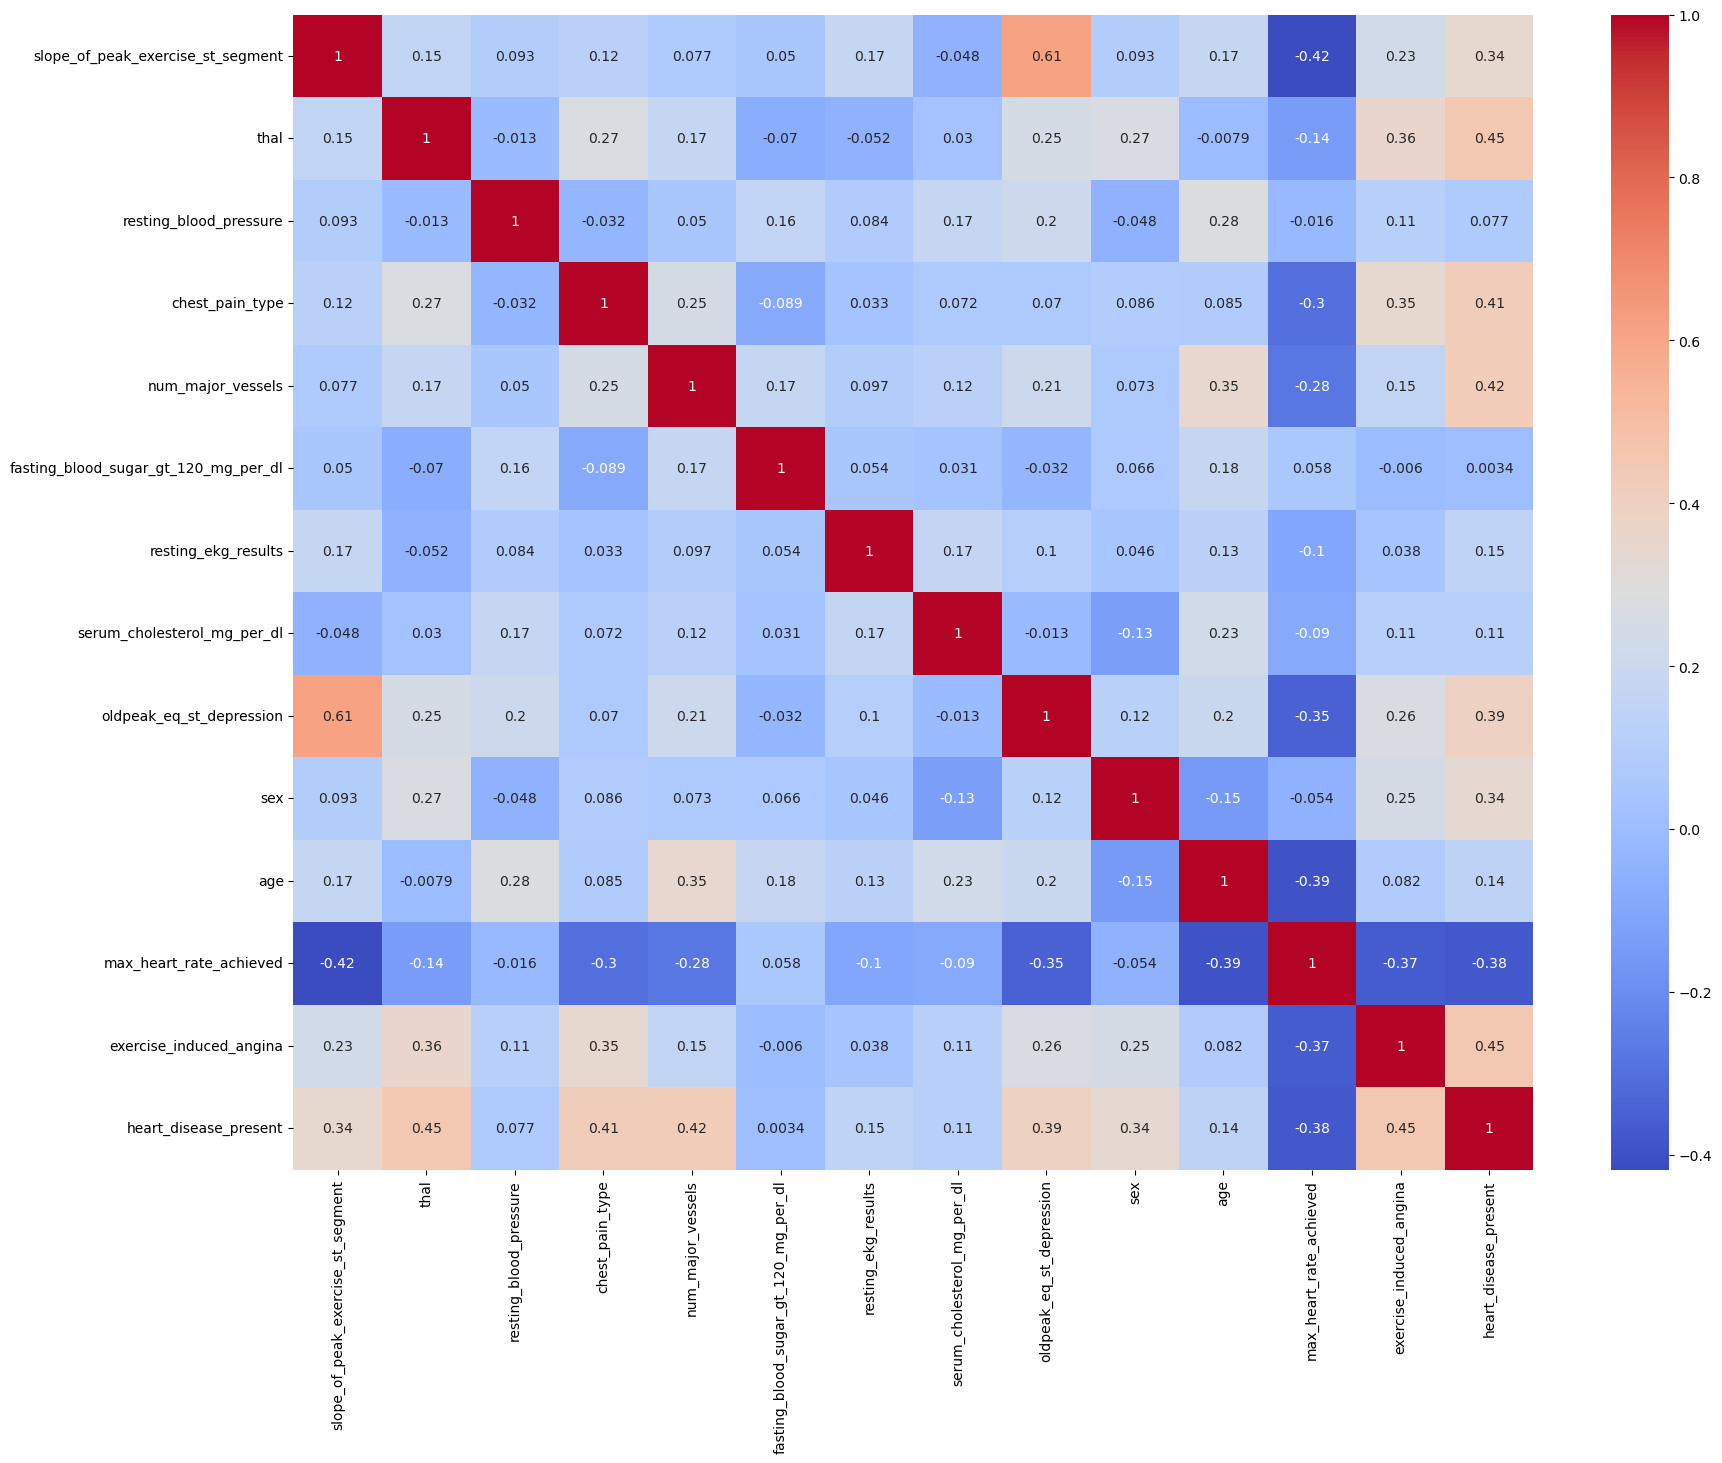

In [48]:
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

In [49]:
x=data.drop(['heart_disease_present'],axis=1)
y=data.heart_disease_present

In [50]:
x

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,1,1,128.0,2,0,0,2,308.0,0.0,1,45,170,0
1,2,1,110.0,3,0,0,0,214.0,1.6,0,54,158,0
2,1,1,125.0,4,3,0,2,304.0,0.0,1,77,162,1
3,1,2,152.0,4,0,0,0,223.0,0.0,1,40,181,0
4,3,2,170.0,1,0,0,2,270.0,4.0,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,2,125.0,4,2,1,0,254.0,0.2,1,67,163,0
176,2,1,170.0,4,0,0,1,327.0,3.4,0,55,117,1
177,2,2,125.0,3,0,0,0,309.0,1.8,1,64,131,1
178,1,1,124.0,3,2,1,0,255.0,0.0,1,48,175,0


In [51]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

# scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [53]:
x_scaled

array([[0.        , 0.5       , 0.44736842, ..., 0.33333333, 0.69811321,
        0.        ],
       [0.5       , 0.5       , 0.21052632, ..., 0.52083333, 0.58490566,
        0.        ],
       [0.        , 0.5       , 0.40789474, ..., 1.        , 0.62264151,
        1.        ],
       ...,
       [0.5       , 1.        , 0.40789474, ..., 0.72916667, 0.33018868,
        1.        ],
       [0.        , 0.5       , 0.39473684, ..., 0.39583333, 0.74528302,
        0.        ],
       [0.        , 0.5       , 0.86842105, ..., 0.52083333, 0.63207547,
        0.        ]])

In [54]:
x1=pd.DataFrame(x_scaled,columns=x.columns)

In [55]:
x1

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0.0,0.5,0.447368,0.333333,0.000000,0.0,1.0,0.709552,0.00,1.0,0.333333,0.698113,0.0
1,0.5,0.5,0.210526,0.666667,0.000000,0.0,0.0,0.343080,0.40,0.0,0.520833,0.584906,0.0
2,0.0,0.5,0.407895,1.000000,1.000000,0.0,1.0,0.693957,0.00,1.0,1.000000,0.622642,1.0
3,0.0,1.0,0.763158,1.000000,0.000000,0.0,0.0,0.378168,0.00,1.0,0.229167,0.801887,0.0
4,1.0,1.0,1.000000,0.000000,0.000000,0.0,1.0,0.561404,1.00,1.0,0.625000,0.462264,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0.5,1.0,0.407895,1.000000,0.666667,1.0,0.0,0.499025,0.05,1.0,0.791667,0.632075,0.0
176,0.5,0.5,1.000000,1.000000,0.000000,0.0,0.5,0.783626,0.85,0.0,0.541667,0.198113,1.0
177,0.5,1.0,0.407895,0.666667,0.000000,0.0,0.0,0.713450,0.45,1.0,0.729167,0.330189,1.0
178,0.0,0.5,0.394737,0.666667,0.666667,1.0,0.0,0.502924,0.00,1.0,0.395833,0.745283,0.0


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.25,random_state=33)

In [57]:
x_train

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
172,0.5,1.0,0.315789,1.000000,0.000000,0.0,0.0,0.362573,0.30,1.0,0.208333,0.415094,0.0
6,0.5,1.0,0.736842,1.000000,0.666667,0.0,1.0,0.514620,0.65,0.0,0.645833,0.575472,0.0
92,0.0,0.5,0.539474,0.666667,0.000000,1.0,0.0,0.693957,0.00,0.0,0.520833,0.698113,0.0
24,0.0,0.5,0.815789,0.333333,0.000000,0.0,1.0,0.463938,0.00,1.0,0.854167,0.443396,0.0
79,0.5,1.0,0.473684,1.000000,0.333333,0.0,1.0,0.499025,0.35,1.0,0.708333,0.481132,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.5,1.0,0.342105,1.000000,0.666667,0.0,0.0,0.549708,0.45,1.0,0.687500,0.028302,1.0
146,0.0,1.0,0.605263,0.000000,0.000000,0.0,0.0,0.284600,0.35,1.0,0.229167,0.773585,1.0
66,0.5,0.5,0.473684,1.000000,1.000000,0.0,1.0,0.764133,0.60,1.0,0.854167,0.122642,0.0
135,0.0,1.0,0.342105,1.000000,0.000000,0.0,0.0,0.198830,0.10,1.0,0.750000,0.415094,0.0


In [58]:
x_test

,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
44,0.0,0.5,0.184211,0.666667,0.000000,0.0,1.0,0.549708,0.000,0.0,0.520833,0.669811,0.0
29,0.0,0.5,0.210526,0.666667,0.000000,0.0,0.0,0.191033,0.150,1.0,0.458333,0.254717,0.0
156,0.0,0.5,0.605263,0.000000,0.666667,0.0,0.0,0.440546,0.450,0.0,0.833333,0.518868,0.0
179,0.0,0.5,0.868421,0.666667,0.333333,0.0,0.0,0.292398,0.000,0.0,0.520833,0.632075,0.0
8,1.0,1.0,1.000000,1.000000,0.000000,0.0,1.0,0.779727,0.850,1.0,0.625000,0.415094,1.0
17,0.0,1.0,0.473684,1.000000,0.333333,0.0,0.0,0.495127,0.350,1.0,0.645833,0.452830,1.0
134,0.0,1.0,0.407895,1.000000,0.666667,0.0,1.0,0.678363,0.000,1.0,0.604167,0.707547,0.0
130,0.0,1.0,0.000000,0.666667,0.333333,0.0,0.0,0.393762,0.000,1.0,0.458333,0.547170,1.0
76,0.5,0.5,0.552632,0.666667,0.000000,0.0,1.0,0.272904,0.025,0.0,0.479167,0.688679,0.0
14,0.5,1.0,0.342105,0.000000,0.000000,0.0,0.0,0.409357,0.950,1.0,0.187500,0.811321,1.0


In [59]:
y_train

172    1
6      1
92     0
24     0
79     1
      ..
57     1
146    0
66     1
135    0
20     0
Name: heart_disease_present, Length: 135, dtype: int64

In [60]:
y_test

44     0
29     0
156    0
179    0
8      1
17     1
134    1
130    0
76     0
14     1
38     0
34     1
124    1
126    0
175    1
15     1
47     0
82     1
64     0
71     0
178    0
50     1
104    0
109    1
65     1
81     1
164    0
163    1
27     0
136    1
54     1
132    0
94     0
95     0
151    0
148    1
42     0
105    0
176    1
68     0
166    0
22     0
141    0
62     1
116    0
Name: heart_disease_present, dtype: int64

# balancing the data

In [61]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x_train,y_train)

In [62]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 74, 1: 61})
Counter({1: 74, 0: 74})


# model building

In [63]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred1=rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7777777777777778

In [64]:
# Baging Algorithm
from sklearn.ensemble import BaggingClassifier
bc=BaggingClassifier()
bc.fit(x_train,y_train)
y_pred2=bc.predict(x_test)
accuracy_score(y_test,y_pred2)

0.6222222222222222

In [65]:
# K Nearest Neighbor Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred3=knn.predict(x_test)
accuracy_score(y_test,y_pred3)

0.8

In [66]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
l=LogisticRegression()
l.fit(x_train,y_train)
y_pred=l.predict(x_test)
accuracy_score(y_test,y_pred)

0.7777777777777778

In [67]:
# Support Vector Machine Algorithm
from sklearn.svm import SVC
svm=SVC()
svm.fit(x_train,y_train)
y_pred5=svm.predict(x_test)
accuracy_score(y_test,y_pred5)

0.8

In [68]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(x_train,y_train)
y_pred6=nb.predict(x_test)
accuracy_score(y_test,y_pred6)

0.7111111111111111

In [69]:
# Gradient Boosting ALgorithm
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred7=gbc.predict(x_test)
accuracy_score(y_test,y_pred7)

0.7555555555555555

In [70]:
# Extreme Boosting Algorithm
import xgboost as xg
xgc=xg.XGBClassifier()
xgc.fit(x_train,y_train)
y_pred11=xgc.predict(x_test)
accuracy_score(y_test,y_pred11)

0.7555555555555555

In [71]:
list_of_algorithms=[l,rfc,bc,nb,svm,knn,gbc,xgc]

In [72]:
# Selecting best algorithm using cross validation
from sklearn.model_selection import cross_val_score
accuracy_cvs=[]
for i in list_of_algorithms:
    cvs=cross_val_score(i,x,y,cv=5,scoring='accuracy')
    p=cvs.mean()
    accuracy_cvs.append(p)
accuracy_cvs    

[0.8388888888888889,
 0.8055555555555556,
 0.7611111111111111,
 0.7166666666666667,
 0.6,
 0.55,
 0.8,
 0.8111111111111111]

In [73]:
names_of_algorithms=['Logistic Regression','Random Forest','Naive Bayes','Support Vector Machine','K Nearest Neighbor','BaggingClassifier','GradientBoosting','xgboost']

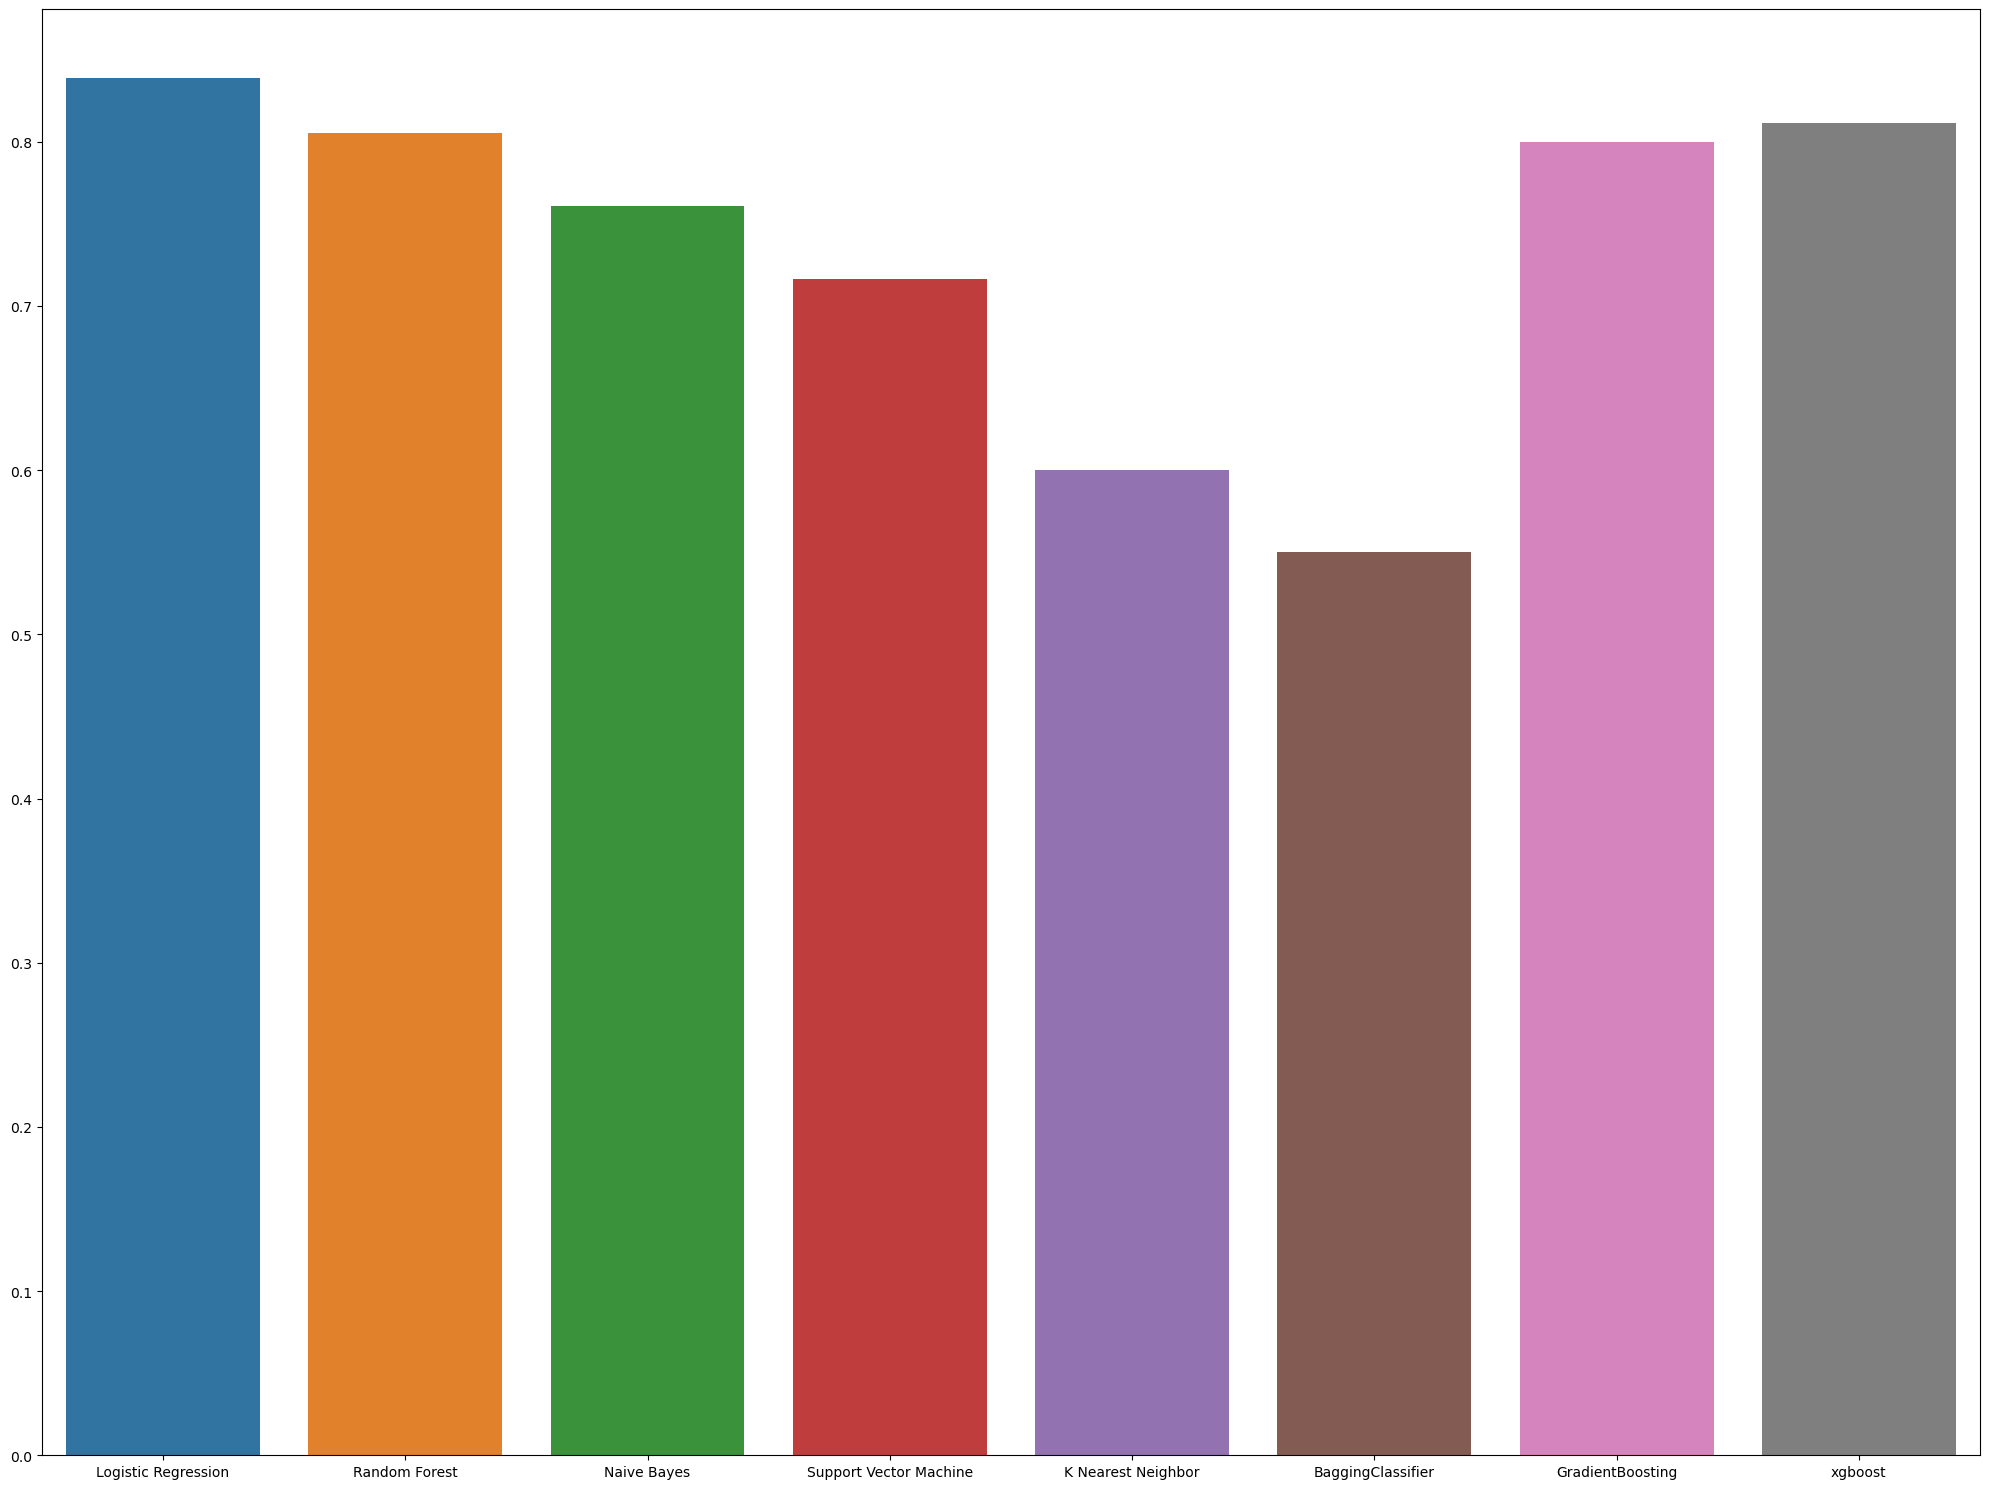

In [74]:
plt.figure(figsize=(20,15))
sns.barplot(x=names_of_algorithms,y=accuracy_cvs)
plt.tight_layout()

# finalizing the algorithm
among all algorithms random forest classifier gave the more accuracy.so finalized algorithm is random forest classifieer

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred1=rfc.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred1)

0.7333333333333333

# evaluation metrics

In [76]:
from sklearn.metrics import classification_report,precision_score,recall_score,confusion_matrix,f1_score

<AxesSubplot:>

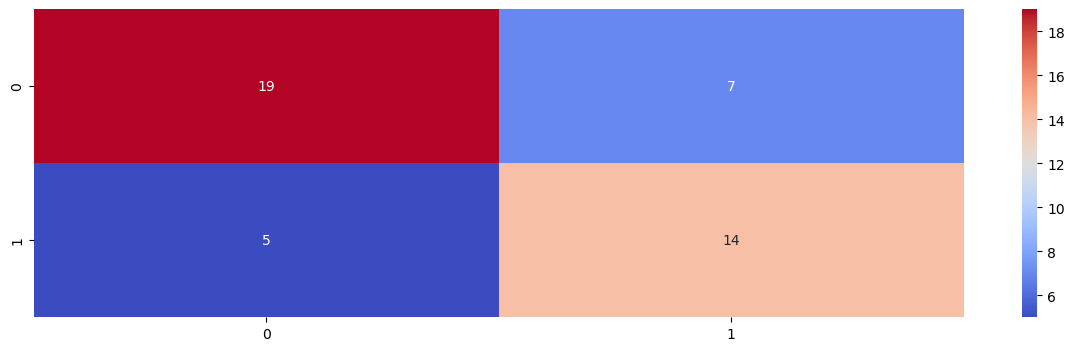

In [77]:
plt.figure(figsize=(15,4))
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,cmap='coolwarm')

In [78]:
# Precision
precision=precision_score(y_test,y_pred1)
print(" Precision Score :",precision)

 Precision Score : 0.6666666666666666


In [79]:
# Recall
recall=recall_score(y_test,y_pred1)
print(" Recall Score  :",recall)

 Recall Score  : 0.7368421052631579


In [80]:
# F1-Score
f1=f1_score(y_test,y_pred1)
print(" F1 Score :",f1)

 F1 Score : 0.7


In [81]:
accuracy=accuracy_score(y_test,y_pred1)
accuracy

0.7333333333333333

In [82]:
# Classification report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        26
           1       0.67      0.74      0.70        19

    accuracy                           0.73        45
   macro avg       0.73      0.73      0.73        45
weighted avg       0.74      0.73      0.73        45

